In [1]:
import tensorflow as tf
import os

### Avoid OOM error by setting GPU memory consumption growth

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Remove Dodgy images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data'

In [5]:
os.listdir(data_dir)

['happy', '.DS_Store', 'sad']

In [6]:
# Looping through every image in happy folder

os.listdir(os.path.join(data_dir, 'happy'))

['images32.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 '05-12-21-happy-people.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '-minimalism-design-vector-illustration-happy-life-positive-success-158792253.jpg',
 'Happy.jpg',
 'images123.jpg',
 'TELEMMGLPICT000173686698_trans_NvBQzQNjv4BqpVlberWd9EgFPZtcLiMQfyf2A9a6I9YchsjMeADBa08.jpeg',
 'Overtly-Cheerful-Primer-Editorials-min.png',
 '925b01b2-8f84-41d0-bcec-ca58edcf62b0-fotolia_162752326_subscription_monthly_m-1.jpg',
 'Photo-happy-1-unsplash-michael-dam.jpg',
 'shutterstock_1914098188.jpg',
 'freedom.jpg',
 'how-happy-are-healthy-people.jpg',
 '170404-happy-workers-feature.jpg',
 '0_2dFuIXqkGZF3gbav.jpg',
 'images33.jpg',
 'shutterstock_533152165.jpg',
 'friends-happy-190821.jpg',
 'images31.jpg',
 'singleaug22.png',
 'Happy-single-1.jpg',
 'stock-photo-group-of-happy-people-isolated-over-white-background-102307264.jpg',
 'pexels-photo-1999504.jpeg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'single_

In [7]:
image_exts = ['jpeg', 'png', 'jpg', 'bmp']

In [8]:

os.listdir(data_dir)


['happy', '.DS_Store', 'sad']

In [9]:
for image_class in os.listdir(data_dir):
    if (image_class == '.DS_Store'):
        continue
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image is not in text lsit f{}".format(image_path))                
                os.remove(image_path)
        except Exception as e:
            print("Issue with Image f{}".format(image_path))

Image is not in text lsit fdata/sad/.DS_Store


## 1. Load Data

In [10]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 366 files belonging to 2 classes.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-28 22:50:47.792113: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-28 22:50:47.792282: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
data_iterator = data.as_numpy_iterator()

.next() will help to iterate over batches (we have total 32 batches of images and labels made by tensorflow datasets)

In [20]:
batch = data_iterator.next()

In [15]:
len(batch)

2

Here batch1 will be images and batch2 will be labels

In [16]:
batch[0].shape

(32, 256, 256, 3)

- 32 are images saved in every batch
- 256 x 256 is size of image
- 3 is color channels (RGB)

In [21]:
batch[1]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int32)

- class 1 = sad people
- class 0 = happy people

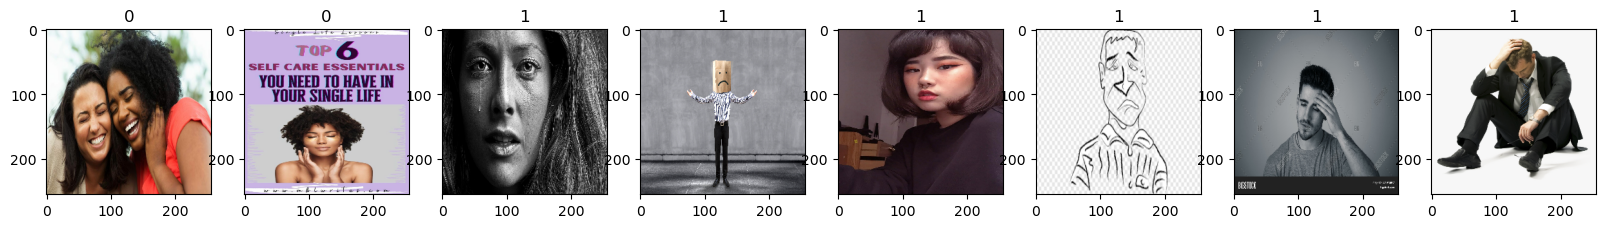

In [25]:
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Pre-Processing Data

In [26]:
batch[0].min()

0.0

In [27]:
batch[0].max()

255.0

- As we have minimum value = 0  and maximum value = 255
- we have to make our data value as short as possible to optimize our neural network model
- we are gonna divide every value with 255 and give us value between 0 and 1

In [29]:
scaled = batch[0]/255

## 2. Process Data

Scale data

In [30]:
data = data.map(lambda x,y: (x/255, y))

In [33]:
scaled_Iterator = data.as_numpy_iterator()

In [34]:
batch = scaled_Iterator.next()

In [35]:
batch[0].max()

1.0

### Split Data

In [36]:
len(data)

12

In [37]:
train_size = (len(data)*.7)         # 70% of data
val_size = (len(data)*.2)           # 20% of data
test_size = (len(data)*.1)          # 10% of data

In [41]:
train_size + val_size + test_size

12.0

In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

TypeError: Cannot convert 8.399999999999999 to EagerTensor of dtype int64

## 3. Building DeepLearning Model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Train

In [47]:
logdir='logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

NameError: name 'train' is not defined